In [7]:
import kagglehub

In [8]:
!kaggle datasets download -d nicolemachado/transportation-and-logistics-tracking-dataset

Dataset URL: https://www.kaggle.com/datasets/nicolemachado/transportation-and-logistics-tracking-dataset
License(s): CC0-1.0
transportation-and-logistics-tracking-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# to unzip and extract the folder to a different location
import zipfile
zip_path = "/Users/keerthanakola/transportation-and-logistics-tracking-dataset.zip"
extract_to = "/Users/keerthanakola/Downloads/Forme/logistics_tracking"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [10]:
# to check the number of files in the folder. 
import os
for file_name in os.listdir(extract_to):
    print(file_name)

Transportation and Logistics Tracking Dataset..xlsx
delivery_performance.csv


In [11]:
import pandas as pd
logistics_tracker = pd.read_excel("/Users/keerthanakola/Downloads/Forme/logistics_tracking/Transportation and Logistics Tracking Dataset..xlsx")

In [12]:
logistics_tracker.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,32 FT Single-Axle 7MT - HCV,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,32 FT Multi-Axle 14MT - HCV,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,1 MT Tata Ace (Open Body),NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,32 FT Multi-Axle 14MT - HCV,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,32 FT Multi-Axle 14MT - HCV,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [13]:
logistics_tracker.info()
logistics_tracker.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

In [14]:
# to perform delivery performance of the organisation, we are copying the necessary columns to a new table. 
delivery_performance = logistics_tracker[['BookingID_Date','trip_start_date','trip_end_date','Planned_ETA','actual_eta','Origin_Location','Destination_Location','ontime','delay','vehicle_no','TRANSPORTATION_DISTANCE_IN_KM','vehicleType','OriginLocation_Code','DestinationLocation_Code','supplierID','supplierNameCode']]



In [15]:
# seems like the there are null values in 'delay' and 'ontime' columns because either of them were recorded upon satisfying the condition.
delivery_performance.info()
delivery_performance.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   BookingID_Date                 6880 non-null   datetime64[ns]
 1   trip_start_date                6880 non-null   object        
 2   trip_end_date                  6686 non-null   object        
 3   Planned_ETA                    6880 non-null   object        
 4   actual_eta                     6843 non-null   object        
 5   Origin_Location                6880 non-null   object        
 6   Destination_Location           6880 non-null   object        
 7   ontime                         2548 non-null   object        
 8   delay                          4342 non-null   object        
 9   vehicle_no                     6880 non-null   object        
 10  TRANSPORTATION_DISTANCE_IN_KM  6168 non-null   float64       
 11  vehicleType      

BookingID_Date                      0
trip_start_date                     0
trip_end_date                     194
Planned_ETA                         0
actual_eta                         37
Origin_Location                     0
Destination_Location                0
ontime                           4332
delay                            2538
vehicle_no                          0
TRANSPORTATION_DISTANCE_IN_KM     712
vehicleType                       769
OriginLocation_Code                 3
DestinationLocation_Code           27
supplierID                          0
supplierNameCode                    0
dtype: int64

In [16]:
# to check if there are rows where both the columns are empty
import pandas as pd

missing_both = delivery_performance[
    delivery_performance['ontime'].isnull() & delivery_performance['delay'].isnull()]

print(missing_both[['ontime', 'delay']])


     ontime delay
1514    NaN   NaN
1595    NaN   NaN
2725    NaN   NaN
2732    NaN   NaN
2733    NaN   NaN
2734    NaN   NaN
5379    NaN   NaN
5384    NaN   NaN
5390    NaN   NaN
5412    NaN   NaN
5413    NaN   NaN
5438    NaN   NaN
5439    NaN   NaN
5440    NaN   NaN


In [17]:
# Remove rows where both 'ontime' and 'delay' are NaN! Post execution the summation of 'ontime' and 'delay' non-null is the size of dataset.
delivery_performance = delivery_performance.dropna(subset=['ontime', 'delay'], how='all')
delivery_performance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6866 entries, 0 to 6879
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   BookingID_Date                 6866 non-null   datetime64[ns]
 1   trip_start_date                6866 non-null   object        
 2   trip_end_date                  6672 non-null   object        
 3   Planned_ETA                    6866 non-null   object        
 4   actual_eta                     6843 non-null   object        
 5   Origin_Location                6866 non-null   object        
 6   Destination_Location           6866 non-null   object        
 7   ontime                         2548 non-null   object        
 8   delay                          4342 non-null   object        
 9   vehicle_no                     6866 non-null   object        
 10  TRANSPORTATION_DISTANCE_IN_KM  6158 non-null   float64       
 11  vehicleType           

## Performing delivery analysis: 

# 1. Delayed rate

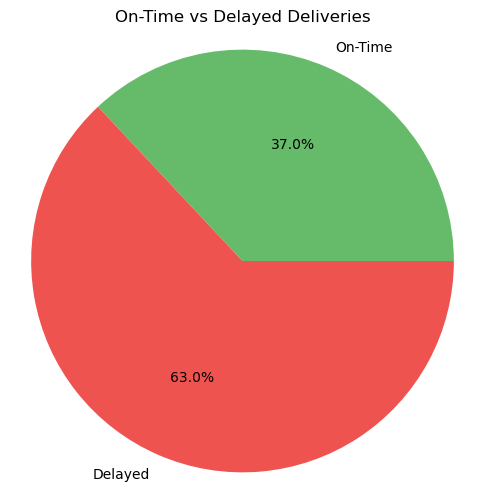

In [20]:



# to print the perecentile of 'delayed' and 'ontime' delivereies of the organisation total.
import matplotlib.pyplot as plt


labels = ['On-Time', 'Delayed']
# this reads the count of values in the dataset ignoring the null values
sizes = [delivery_performance['ontime'].count(), delivery_performance['delay'].count()]
colors = ['#66bb6a', '#ef5350']  # green for on-time, red for delayed

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('On-Time vs Delayed Deliveries')
plt.axis('equal')
plt.show()


In [21]:
# to convert the two columns to datetime to perform agg
delivery_performance['Planned_ETA'] = pd.to_datetime(delivery_performance['Planned_ETA'], errors='coerce')
delivery_performance['actual_eta'] = pd.to_datetime(delivery_performance['actual_eta'], errors='coerce')

In [22]:
# calculating the delay in seconds of each trip.
delivery_performance['delay_duration'] = (delivery_performance['actual_eta'] - delivery_performance['Planned_ETA']).dt.total_seconds() / 3600
delivery_performance['delay_duration'] = delivery_performance['delay_duration'].apply(lambda x: x if x > 0 else 0)
delivery_performance = delivery_performance.dropna(subset=['delay_duration'])

# 2. Average delay duration

In [24]:



# calculating the average delay duration. 
avg_delay = delivery_performance['delay_duration'].mean()
print(f"Average Delay Duration (hours): {avg_delay:.2f}")

maximum_delay = delivery_performance['delay_duration'].max()
print(f"Maximum delay(hours):{ maximum_delay:.2f}") 

Average Delay Duration (hours): 237.80
Maximum delay(hours):7394.95


# 3. routes which are either problematic or which are affecting the driver's trip/delivery. 

In [26]:

top_routes = (
    delivery_performance[delivery_performance['delay_duration'] > 0]
    .groupby(['Origin_Location', 'Destination_Location'])
    .agg(
        delay_count=('delay_duration', 'count'),
        avg_delay=('delay_duration', 'mean')
    )
    .sort_values(by='delay_count', ascending=False)
    .reset_index()
)

print(top_routes.head())


                        Origin_Location  \
0              Kollur, Medak, Telangana   
1  Mugabala, Bangalore Rural, Karnataka   
2      Khorajnanoda, Ahmedabad, Gujarat   
3        Manali, Tiruvallur, Tamil Nadu   
4            Jamalpur, Gurgaon, Haryana   

                                Destination_Location  delay_count   avg_delay  
0                         Lakdaram, Medak, Telangana          121  419.083540  
1  Bangalore International Airport, Bangalore, Ka...          118  295.820524  
2          Singaperumalkoil, Kanchipuram, Tamil Nadu           93   66.980680  
3             Rayapudupakkam, Villupuram, Tamil Nadu           91  326.231863  
4          Singaperumalkoil, Kanchipuram, Tamil Nadu           86  101.815219  


# 4. vehicles which caused delay

In [28]:

top_vehicles = (
    delivery_performance[delivery_performance['delay_duration'] > 0]
    .groupby('vehicle_no')
    .agg(
        delay_count=('delay_duration', 'count'),
        avg_delay=('delay_duration', 'mean')
    )
    .sort_values(by='delay_count', ascending=False)
    .reset_index()
    
)

print(top_vehicles)


      vehicle_no  delay_count    avg_delay
0     TS15UC9341           31   214.711472
1     TS15UD3695           26   201.498250
2     TS15UD3697           25   265.514467
3     TS15UD3696           25  2069.802426
4     TS15UD3698           24   163.522108
...          ...          ...          ...
1456  NL01AE1953            1    29.329174
1457  NL01AE1956            1   187.099137
1458  NL01AE2506            1   221.160144
1459  NL01AE2515            1    32.730130
1460  MH15DK7533            1   124.116219

[1461 rows x 3 columns]


In [29]:
delivery_performance = delivery_performance .dropna(subset=['vehicleType','TRANSPORTATION_DISTANCE_IN_KM'])

# 5. Trips per vehicle 

In [31]:


# vehicle utilization analysis
trip_counts = delivery_performance ['vehicle_no'].value_counts()
delivery_performance ['num_trips'] = delivery_performance ['vehicle_no'].map(trip_counts)

# now that we have trip counts, let's check if there are any underutilized vehicles
underutilized_vehicles = delivery_performance[delivery_performance['num_trips']<3]
print(underutilized_vehicles.head())



           BookingID_Date      trip_start_date trip_end_date  \
0 2020-08-17 14:59:01.000  2020-08-17 14:59:01           NaN   
1 2020-08-27 16:22:22.827  2020-08-27 16:21:52           NaN   
2 2020-08-27 17:59:24.987  2020-08-27 17:57:04           NaN   
3 2020-08-28 00:48:24.503  2020-08-28 00:47:45           NaN   
4 2020-08-28 01:23:19.243  2020-08-28 01:13:48           NaN   

              Planned_ETA              actual_eta  \
0 2020-08-21 18:59:01.000 2020-08-28 14:38:04.447   
1 2020-08-31 20:22:22.827 2020-08-28 12:46:17.007   
2 2020-08-31 21:59:24.987 2020-08-28 16:03:30.793   
3 2020-09-01 04:48:24.503 2020-08-28 12:50:27.997   
4 2020-09-01 05:23:19.243 2020-08-28 14:22:50.127   

                                     Origin_Location  \
0               TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU   
1  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
2              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY   
3  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
4              L

In [32]:
max_trips = delivery_performance['num_trips'].max()
overutilized_vehicles = delivery_performance[delivery_performance['num_trips'] == max_trips]
print(overutilized_vehicles.head())


          BookingID_Date      trip_start_date        trip_end_date  \
1909 2020-07-30 13:46:22  2020-07-30 13:46:22  2020-08-01 15:44:00   
1998 2020-06-27 16:37:52  2020-06-27 16:37:52  2020-06-30 08:14:00   
1999 2020-06-30 16:02:15  2020-06-30 16:02:15  2020-07-03 08:13:00   
2000 2020-07-06 15:16:13  2020-07-06 15:16:13  2020-07-08 14:24:00   
2001 2020-05-26 15:15:46  2020-05-26 15:15:46  2020-06-05 12:05:00   

             Planned_ETA              actual_eta           Origin_Location  \
1909 2020-08-01 17:44:00 2020-08-01 15:44:00.000  Kollur, Medak, Telangana   
1998 2020-06-30 10:14:00 2020-06-30 08:14:00.000  Kollur, Medak, Telangana   
1999 2020-07-03 10:13:00 2020-07-03 08:13:00.000  Kollur, Medak, Telangana   
2000 2020-07-08 16:24:00 2020-07-08 14:24:00.000  Kollur, Medak, Telangana   
2001 2020-05-26 19:57:46 2020-07-30 19:18:32.680  Kollur, Medak, Telangana   

                    Destination_Location ontime delay  vehicle_no  \
1909          Lakdaram, Medak, Telangana 

In [33]:
min_trips = delivery_performance['num_trips'].min()
underutilized_vehicles = delivery_performance[delivery_performance['num_trips'] == min_trips]
print(underutilized_vehicles.head())


           BookingID_Date      trip_start_date trip_end_date  \
1 2020-08-27 16:22:22.827  2020-08-27 16:21:52           NaN   
2 2020-08-27 17:59:24.987  2020-08-27 17:57:04           NaN   
3 2020-08-28 00:48:24.503  2020-08-28 00:47:45           NaN   
4 2020-08-28 01:23:19.243  2020-08-28 01:13:48           NaN   
5 2020-08-28 02:14:22.640  2020-08-28 02:13:39           NaN   

              Planned_ETA              actual_eta  \
1 2020-08-31 20:22:22.827 2020-08-28 12:46:17.007   
2 2020-08-31 21:59:24.987 2020-08-28 16:03:30.793   
3 2020-09-01 04:48:24.503 2020-08-28 12:50:27.997   
4 2020-09-01 05:23:19.243 2020-08-28 14:22:50.127   
5 2020-09-01 06:14:22.640 2020-08-28 13:25:50.353   

                                     Origin_Location  \
1  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
2              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY   
3  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
4              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY   
5  DAIMLER INDIA

# 6.  finding the correlation between the eta and the distance

In [35]:


# Drop rows with missing values in relevant columns
correlation_data = delivery_performance[['TRANSPORTATION_DISTANCE_IN_KM', 'actual_eta','Planned_ETA']].dropna()

# Performing correlation check (Pearson by default)
correlation = correlation_data.corr()

print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                               TRANSPORTATION_DISTANCE_IN_KM  actual_eta  \
TRANSPORTATION_DISTANCE_IN_KM                       1.000000    0.125025   
actual_eta                                          0.125025    1.000000   
Planned_ETA                                         0.129862    0.999515   

                               Planned_ETA  
TRANSPORTATION_DISTANCE_IN_KM     0.129862  
actual_eta                        0.999515  
Planned_ETA                       1.000000  


# 7. to calculate average distance per supplier 

In [37]:



avg_distance_supplier = delivery_performance.groupby('supplierID')['TRANSPORTATION_DISTANCE_IN_KM'] \
                                            .mean() \
                                            .reset_index() \
                                            .rename(columns={'TRANSPORTATION_DISTANCE_IN_KM': 'avg_distance_km'})

print(avg_distance_supplier.head())


  supplierID  avg_distance_km
0        777      2435.000000
1        999      1035.741873
2       2785       380.750000
3       6415       980.000000
4       6961       400.000000


# 8. now let's introduce time to our anaysis. let's analyse trends over time.

In [39]:


# changing the Dates to datetime format and extracting the year and month for analysis =>.to_period('M')| .to_period('Y') depending on your analysis.
delivery_performance['BookingID_Date'] = pd.to_datetime(logistics_tracker['BookingID_Date'])
delivery_performance['YearMonth'] = delivery_performance['BookingID_Date'].dt.to_period('M')

# Counting trips per month
trips_per_month = delivery_performance['YearMonth'].value_counts()

# Converting it into a dataframe to visualise a bargraph
trips_per_month_df = trips_per_month.reset_index()
trips_per_month_df.columns = ['YearMonth', 'Num_Trips']
print(trips_per_month_df.sort_values('Num_Trips',ascending = False))


   YearMonth  Num_Trips
0    2020-07        886
1    2020-08        855
2    2019-11        642
3    2019-10        525
4    2019-12        524
5    2020-06        405
6    2020-01        358
7    2019-09        304
8    2019-05        242
9    2019-06        132
10   2019-04        127
11   2019-07        120
12   2020-02         68
13   2020-05         55
14   2019-08         53
15   2020-03         44
16   2019-03         44
17   2020-10          3
18   2020-12          1
19   2020-11          1


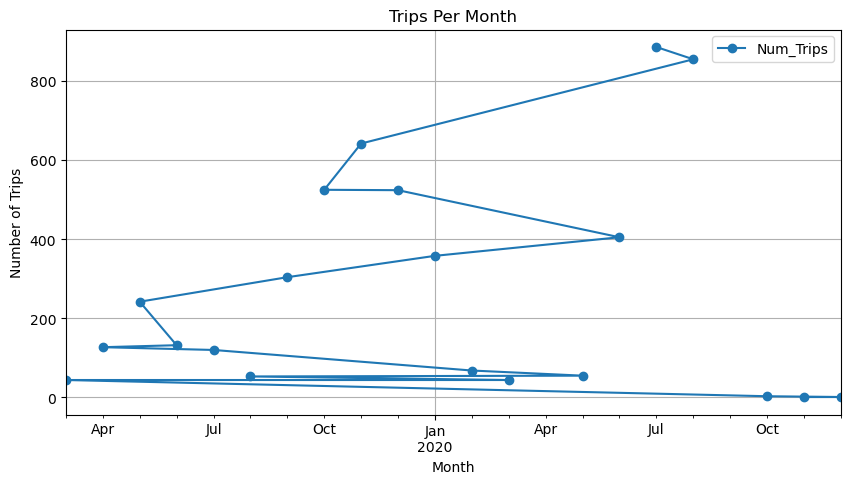

In [40]:
# visualizing the data for a better understanding trend lines

trips_per_month_df.plot(x='YearMonth', y='Num_Trips', kind='line', marker='o', figsize=(10,5), title='Trips Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()
# the reason behind this type of graph is because we were displaying 2 years in same graph. Let's two different colored lines for different years and see.

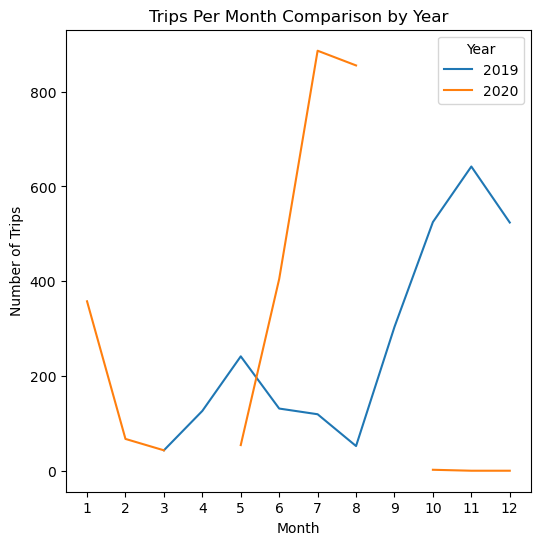

In [41]:
# now to visualise year 2019 and 2020 seperately we pivot the table by extarcting year and month from the original table

trips_per_month_df['Year'] = trips_per_month_df['YearMonth'].dt.year
trips_per_month_df['Month'] = trips_per_month_df['YearMonth'].dt.month
pivot_df = trips_per_month_df.pivot(index='Month', columns='Year', values='Num_Trips')

# Plotting the line graph 
pivot_df.plot(kind='line', figsize=(6, 6), title='Trips Per Month Comparison by Year')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.legend(title='Year')
plt.xticks(range(1, 13))  # Ensure x-axis shows months 1–12
plt.show()


# 9. to check for the delayed trends over time.

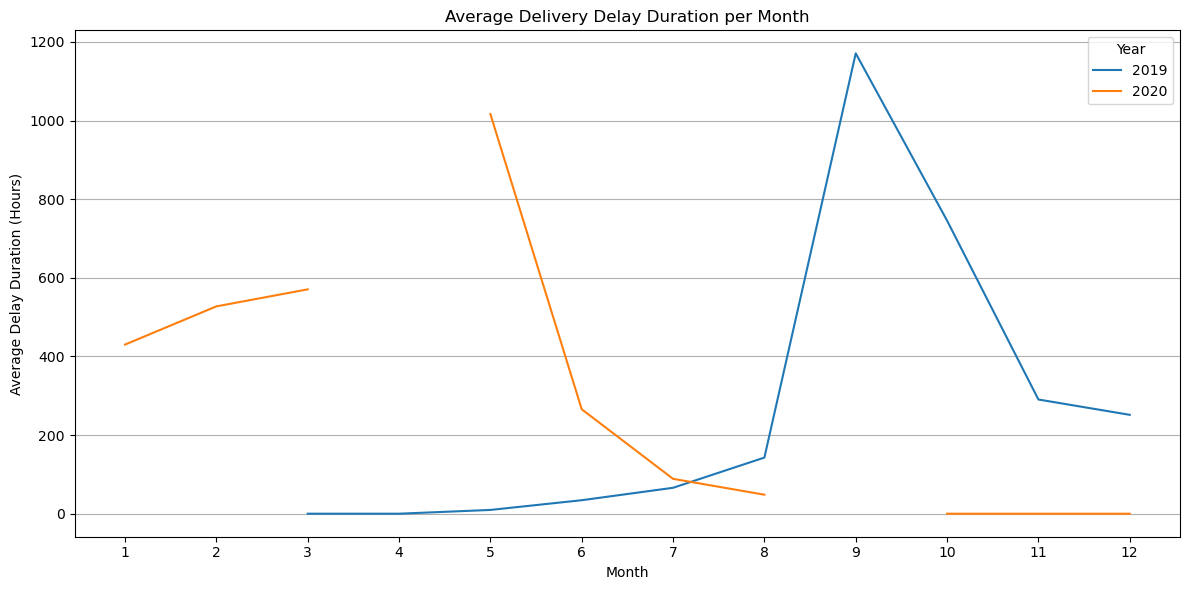

In [43]:

# Grouping by YearMonth and calculating average delay duration
avg_delay_per_month = delivery_performance.groupby('YearMonth')['delay_duration'].mean().reset_index()
avg_delay_per_month.columns = ['YearMonth', 'Avg_Delay_Hours']
avg_delay_per_month['Year'] = avg_delay_per_month['YearMonth'].dt.year
avg_delay_per_month['Month'] = avg_delay_per_month['YearMonth'].dt.month
avg_delay_pivot = avg_delay_per_month.pivot(index='Month', columns='Year', values='Avg_Delay_Hours')




# Plotting the line graph
avg_delay_pivot.plot(kind='line', figsize=(12, 6), title='Average Delivery Delay Duration per Month')
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Average Delay Duration (Hours)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Let's remove outliers for better understanding the trend 

In [44]:
# To remove outliers we are followeing IQR[Inter Quality range] approach.
#calculating the IQR
Q1 = delivery_performance['delay_duration'].quantile(0.25)
Q3 = delivery_performance['delay_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = delivery_performance[(delivery_performance['delay_duration'] >= lower_bound) & (delivery_performance['delay_duration'] <= upper_bound)]


/var/folders/9q/49glxy61169813k6w_142l1w0000gn/T/ipykernel_36043/3465264420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['YearMonth'] = filtered_df['BookingID_Date'].dt.to_period('M')


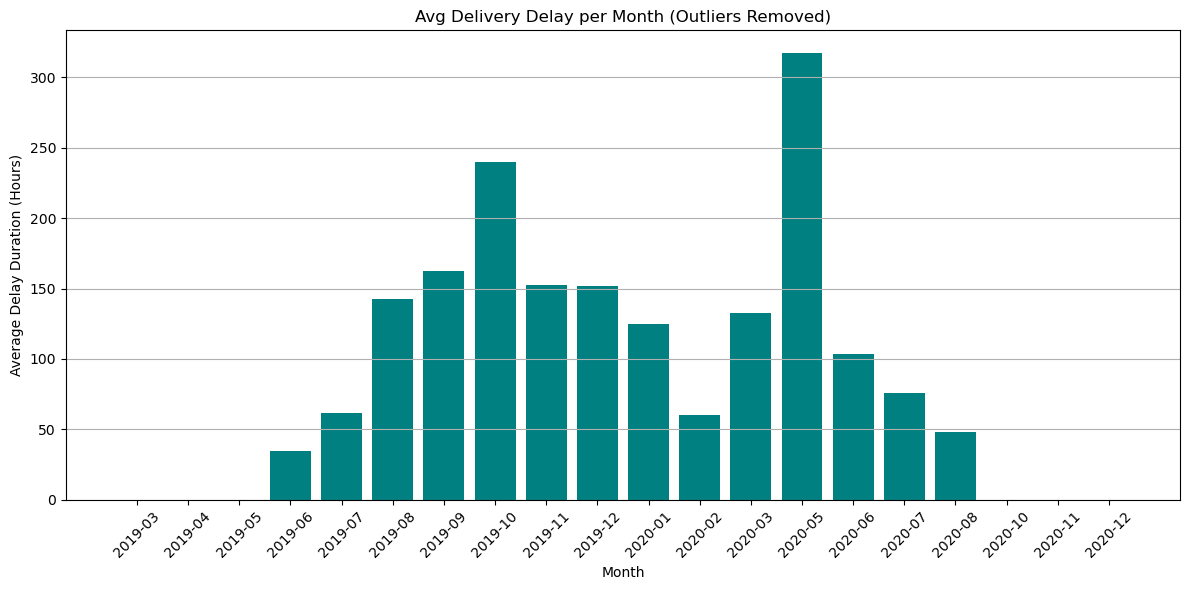

In [45]:
# Group again after filtering
filtered_df['YearMonth'] = filtered_df['BookingID_Date'].dt.to_period('M')
monthly_avg_delay = filtered_df.groupby('YearMonth')['delay_duration'].mean().reset_index()
monthly_avg_delay['YearMonth'] = monthly_avg_delay['YearMonth'].astype(str)

plt.figure(figsize=(12,6))
plt.bar(monthly_avg_delay['YearMonth'], monthly_avg_delay['delay_duration'], color='teal')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Delay Duration (Hours)')
plt.title('Avg Delivery Delay per Month (Outliers Removed)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


this data is so rich, we can draw as amny insights as possible and working on it let's us use different options in analysis. 

In [47]:
delivery_performance.to_csv("/Users/keerthanakola/Downloads/Forme/logistics_tracking/delivery_performance.csv",index = False)